In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

In [3]:
from tensorflow.keras.layers import Conv2D,Input,Dense,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D

In [4]:
df=pd.read_csv(r"./x_ray/sample_labels.csv")

In [5]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


In [6]:
df_new = df.iloc[:, [0, 1, 4,5,6]]

In [7]:
df_new.head()

,Image Index,Finding Labels,Patient Age,Patient Gender,View Position
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,060Y,M,AP
1,00000013_026.png,Cardiomegaly|Emphysema,057Y,M,AP
2,00000017_001.png,No Finding,077Y,M,AP
3,00000030_001.png,Atelectasis,079Y,M,PA
4,00000032_001.png,Cardiomegaly|Edema|Effusion,055Y,F,AP


In [8]:
print(len(df_new.iloc[0,2]))

4


In [9]:
for i in range(len(df)):
    df_new.iloc[i,2]=int((str( df_new.iloc[i,2]))[1:3])

C:\Users\SASWATA\AppData\Local\Temp\ipykernel_2120\3732980023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.iloc[i,2]=int((str( df_new.iloc[i,2]))[1:3])


In [10]:
df_new.head()

,Image Index,Finding Labels,Patient Age,Patient Gender,View Position
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,60,M,AP
1,00000013_026.png,Cardiomegaly|Emphysema,57,M,AP
2,00000017_001.png,No Finding,77,M,AP
3,00000030_001.png,Atelectasis,79,M,PA
4,00000032_001.png,Cardiomegaly|Edema|Effusion,55,F,AP


In [11]:
label=df_new.iloc[:,1]

In [12]:
label_list=[]
for i in label:
    try:
        x=str(i)
        y=x.split('|')
        label_list.append(y)
    except:
        label_list.append(i)

In [13]:
label_list

[['Emphysema', 'Infiltration', 'Pleural_Thickening', 'Pneumothorax'],
 ['Cardiomegaly', 'Emphysema'],
 ['No Finding'],
 ['Atelectasis'],
 ['Cardiomegaly', 'Edema', 'Effusion'],
 ['Consolidation', 'Mass'],
 ['No Finding'],
 ['No Finding'],
 ['Effusion'],
 ['No Finding'],
 ['Consolidation', 'Effusion', 'Infiltration', 'Nodule'],
 ['Mass'],
 ['No Finding'],
 ['No Finding'],
 ['Effusion'],
 ['Effusion'],
 ['Effusion'],
 ['No Finding'],
 ['Mass', 'Pneumothorax'],
 ['Cardiomegaly', 'Consolidation'],
 ['Consolidation'],
 ['Cardiomegaly', 'Consolidation'],
 ['Cardiomegaly', 'Consolidation'],
 ['Pneumothorax'],
 ['No Finding'],
 ['Effusion'],
 ['Consolidation', 'Pleural_Thickening'],
 ['Infiltration', 'Nodule'],
 ['No Finding'],
 ['Atelectasis'],
 ['Atelectasis'],
 ['Fibrosis'],
 ['Infiltration'],
 ['Infiltration'],
 ['No Finding'],
 ['No Finding'],
 ['No Finding'],
 ['No Finding'],
 ['Fibrosis'],
 ['No Finding'],
 ['Consolidation'],
 ['Emphysema'],
 ['No Finding'],
 ['No Finding'],
 ['Infiltra

In [14]:
unique_labels=[]
for i in label_list:
    if len(i)>1:
        for j in i:
            if j not in unique_labels:
                unique_labels.append(j)
    else:
        if i[0] not in unique_labels:
            unique_labels.append(i[0])

In [15]:
unique_labels

['Emphysema',
 'Infiltration',
 'Pleural_Thickening',
 'Pneumothorax',
 'Cardiomegaly',
 'No Finding',
 'Atelectasis',
 'Edema',
 'Effusion',
 'Consolidation',
 'Mass',
 'Nodule',
 'Fibrosis',
 'Pneumonia',
 'Hernia']

In [16]:
len(unique_labels)

15

In [17]:
df_new.head()

,Image Index,Finding Labels,Patient Age,Patient Gender,View Position
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,60,M,AP
1,00000013_026.png,Cardiomegaly|Emphysema,57,M,AP
2,00000017_001.png,No Finding,77,M,AP
3,00000030_001.png,Atelectasis,79,M,PA
4,00000032_001.png,Cardiomegaly|Edema|Effusion,55,F,AP


In [18]:
label_list

[['Emphysema', 'Infiltration', 'Pleural_Thickening', 'Pneumothorax'],
 ['Cardiomegaly', 'Emphysema'],
 ['No Finding'],
 ['Atelectasis'],
 ['Cardiomegaly', 'Edema', 'Effusion'],
 ['Consolidation', 'Mass'],
 ['No Finding'],
 ['No Finding'],
 ['Effusion'],
 ['No Finding'],
 ['Consolidation', 'Effusion', 'Infiltration', 'Nodule'],
 ['Mass'],
 ['No Finding'],
 ['No Finding'],
 ['Effusion'],
 ['Effusion'],
 ['Effusion'],
 ['No Finding'],
 ['Mass', 'Pneumothorax'],
 ['Cardiomegaly', 'Consolidation'],
 ['Consolidation'],
 ['Cardiomegaly', 'Consolidation'],
 ['Cardiomegaly', 'Consolidation'],
 ['Pneumothorax'],
 ['No Finding'],
 ['Effusion'],
 ['Consolidation', 'Pleural_Thickening'],
 ['Infiltration', 'Nodule'],
 ['No Finding'],
 ['Atelectasis'],
 ['Atelectasis'],
 ['Fibrosis'],
 ['Infiltration'],
 ['Infiltration'],
 ['No Finding'],
 ['No Finding'],
 ['No Finding'],
 ['No Finding'],
 ['Fibrosis'],
 ['No Finding'],
 ['Consolidation'],
 ['Emphysema'],
 ['No Finding'],
 ['No Finding'],
 ['Infiltra

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=unique_labels)
binary_labels = mlb.fit_transform(label_list)

In [20]:
binary_labels

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

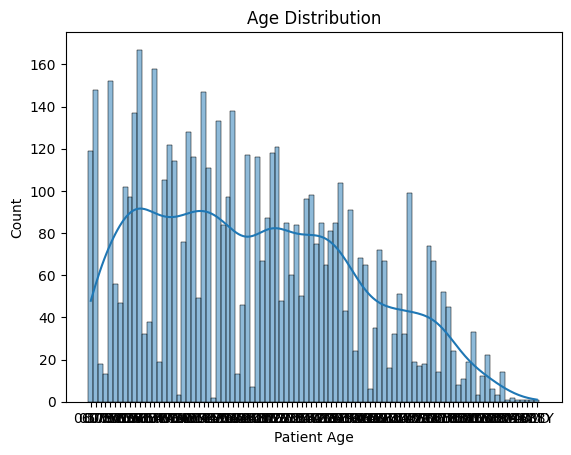

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Patient Age'], kde=True)
plt.title("Age Distribution")
plt.show()


In [22]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [23]:
scale=MinMaxScaler()
le=LabelEncoder()

In [24]:
df_new.iloc[:, 2] = scale.fit_transform(df_new.iloc[:, [2]])

In [25]:
df_new.iloc[:, 3] = le.fit_transform(df_new.iloc[:, [3]])

C:\Users\SASWATA\.conda\envs\gpusupport\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
df_new.iloc[:, 4] = le.fit_transform(df_new.iloc[:, [4]])

C:\Users\SASWATA\.conda\envs\gpusupport\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
df_new.head()

,Image Index,Finding Labels,Patient Age,Patient Gender,View Position
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,0.634409,1,0
1,00000013_026.png,Cardiomegaly|Emphysema,0.602151,1,0
2,00000017_001.png,No Finding,0.817204,1,0
3,00000030_001.png,Atelectasis,0.838710,1,1
4,00000032_001.png,Cardiomegaly|Edema|Effusion,0.580645,0,0


In [28]:
from PIL import Image
import numpy as np
import os
def load_and_preprocess_image(path, target_size=(224,224)):
    image = Image.open(path).convert('RGB')
    image = image.resize(target_size)
    return np.array(image) / 255.0  # normalize to [0, 1]

In [33]:
def build_meta(row):
    return  [row['Patient Gender'], row['View Position']]

df_new['x_meta'] = df_new.apply(build_meta, axis=1)


C:\Users\SASWATA\AppData\Local\Temp\ipykernel_2120\1458983627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['x_meta'] = df_new.apply(build_meta, axis=1)


def build_meta(row):
    return [row['Patient Age'], row['Patient Gender']]

df_new['x_meta'] = df_new.apply(build_meta, axis=1)


In [34]:
import os
df_new['image_path'] = df_new['Image Index'].apply(
    lambda fn: os.path.join('.', 'x_ray', 'sample', 'images', fn)
)

C:\Users\SASWATA\AppData\Local\Temp\ipykernel_2120\4286216819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['image_path'] = df_new['Image Index'].apply(


In [35]:
from PIL import Image
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input

def load_img(path):
    img = Image.open(path).convert('RGB').resize((224,224))
    arr = np.array(img, dtype=np.float32)
    return arr/255.0

df_new['x_image'] = df_new['image_path'].apply(load_img)

C:\Users\SASWATA\AppData\Local\Temp\ipykernel_2120\3675149030.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['x_image'] = df_new['image_path'].apply(load_img)


In [36]:
df_new.head()

,Image Index,Finding Labels,Patient Age,Patient Gender,View Position,image_path,x_image,x_meta
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,0.634409,1,0,.\x_ray\sample\images\00000013_005.png,"[[[0.31764707, 0.31764707, 0.31764707], [0.313...","[1, 0]"
1,00000013_026.png,Cardiomegaly|Emphysema,0.602151,1,0,.\x_ray\sample\images\00000013_026.png,"[[[0.015686275, 0.015686275, 0.015686275], [0....","[1, 0]"
2,00000017_001.png,No Finding,0.817204,1,0,.\x_ray\sample\images\00000017_001.png,"[[[0.043137256, 0.043137256, 0.043137256], [0....","[1, 0]"
3,00000030_001.png,Atelectasis,0.838710,1,1,.\x_ray\sample\images\00000030_001.png,"[[[0.2, 0.2, 0.2], [0.078431375, 0.078431375, ...","[1, 1]"
4,00000032_001.png,Cardiomegaly|Edema|Effusion,0.580645,0,0,.\x_ray\sample\images\00000032_001.png,"[[[0.023529412, 0.023529412, 0.023529412], [0....","[0, 0]"


In [37]:
X = {
    'x_image'    : np.stack(df_new['x_image'].values),   # shape (N,224,224,3)
    'x_metadata' : np.stack(df_new['x_meta'].values)     # shape (N,5)
}

In [38]:
y=binary_labels

In [39]:
num_samples = len(y)
split_index = int(0.8 * num_samples)
X_train = {
    'x_image': X['x_image'][:split_index],
    'x_metadata': X['x_metadata'][:split_index]
}
y_train = y[:split_index]
X_test = {
    'x_image': X['x_image'][split_index:],
    'x_metadata': X['x_metadata'][split_index:]
}
y_test = y[split_index:]

In [40]:
print(f"Train: {X_train['x_image'].shape}, {X_train['x_metadata'].shape}, {y_train.shape}")
print(f"Test : {X_test['x_image'].shape}, {X_test['x_metadata'].shape}, {y_test.shape}")


Train: (4484, 224, 224, 3), (4484, 2), (4484, 15)
Test : (1122, 224, 224, 3), (1122, 2), (1122, 15)


In [41]:
y_train.shape

(4484, 15)

In [42]:
from tensorflow.keras import layers

In [43]:
img_input=layers.Input(shape=(224,224,3),name='x_image')
metadata_input=layers.Input(shape=(2,),name='x_metadata')

x1=layers.Conv2D(64,3,activation='relu',padding='same')(img_input)
x1=layers.MaxPooling2D()(x1)
x1=layers.Conv2D(128,3,padding='same')(x1)
x1=layers.ReLU()(x1)
x1=layers.MaxPooling2D()(x1)
skip1_x1=x1
x1=layers.Conv2D(128,3,activation='relu',padding='same')(x1)
x1=layers.ReLU()(x1)
x1=layers.MaxPooling2D()(x1)
x1=layers.Conv2D(256,3,padding='same')(x1)
x1=layers.ReLU()(x1)
x1=layers.MaxPooling2D()(x1)
skip2_x1=x1
x1=layers.Conv2D(256,3,activation='relu',padding='same')(x1)
x1=layers.ReLU()(x1)
x1=layers.MaxPooling2D()(x1)
x1=layers.Conv2D(512,3,padding='same')(x1)
x1=layers.ReLU()(x1)
x1=layers.MaxPooling2D()(x1)
x1=layers.Dropout(0.25)(x1)
skip3_x1=x1
x1=layers.Conv2D(512,3,activation='relu',padding='same')(x1)
y=layers.MaxPooling2D()(x1)
x1=layers.GlobalAveragePooling2D()(x1)

def process_skip(skip):
    pooled = layers.Conv2D(1,3,activation='relu',padding='same')(skip)       
    return pooled

skip1 = skip1_x1
skip2 = skip2_x1
skip3 = skip3_x1  

y1=layers.Conv2D(1024,3,activation='relu',padding='same')(y)
y1=layers.UpSampling2D((3,3))(y1)
y1=layers.Conv2DTranspose(512,3,activation='relu',padding='same')(y1)
y1=layers.Conv2D(512,3,activation='relu',padding='same')(y1)
y1=layers.Concatenate()([y1,skip3])
y1=layers.Conv2DTranspose(256,3,activation='relu',padding='same')(y1)
y1=layers.Conv2D(256,3,activation='relu',padding='same')(y1)
y1=layers.UpSampling2D((4,4))(y1)
y1=layers.ZeroPadding2D(padding=((1,1),(1,1)))(y1)
y1=layers.Concatenate()([y1,skip2])
y1=layers.Conv2DTranspose(128,3,activation='relu',padding='same')(y1)
y1=layers.Conv2D(128,3,activation='relu',padding='same')(y1)
y1=layers.UpSampling2D((4,4))(y1)
y1=layers.Concatenate()([y1,skip1])
y1=layers.Conv2DTranspose(64,3,activation='relu',padding='same')(y1)
y1=layers.Conv2D(64,3,activation='relu',padding='same')(y1)
y1=layers.Flatten()(y1)

x2 = layers.Dense(64, activation='relu')(metadata_input)
x2 = layers.Dense(128, activation='relu')(x2)
x2=layers.Dropout(0.2)(x2)
x2=layers.Flatten()(x2)

merged_feature=layers.Concatenate()([x1,x2,y1])

y=layers.Dense(512,activation='relu')(merged_feature)
y=layers.Dense(256,activation='relu')(y)
y=layers.Dropout(0.4)(y)
y=layers.Dense(128,activation='relu')(y)
y=layers.Dropout(0.6)(y)
y=layers.Dense(64,activation='relu')(y)
output=layers.Dense(len(unique_labels),activation='sigmoid')(y)

model=tf.keras.Model(inputs=[img_input,metadata_input],outputs=output)

In [44]:
import tensorflow as tf

class SubsetAccuracy(tf.keras.metrics.Metric):
    def __init__(self, name='subset_accuracy', **kwargs):
        super(SubsetAccuracy, self).__init__(name=name, **kwargs)
        self.total = self.add_weight(name='total', initializer='zeros')
        self.count = self.add_weight(name='count', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred_bin = tf.cast(y_pred > 0.5, tf.int32)
        y_true_bin = tf.cast(y_true, tf.int32)
        equal = tf.reduce_all(tf.equal(y_pred_bin, y_true_bin), axis=1)
        self.count.assign_add(tf.reduce_sum(tf.cast(equal, tf.float32)))
        self.total.assign_add(tf.cast(tf.shape(y_true)[0], tf.float32))

    def result(self):
        return self.count / self.total

    def reset_states(self):
        self.total.assign(0.)
        self.count.assign(0.)


In [45]:
from tensorflow_addons.losses import SigmoidFocalCrossEntropy
model.compile(
    optimizer='adam',
    loss=SigmoidFocalCrossEntropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        SubsetAccuracy(name='subset_accuracy')
    ]
)

C:\Users\SASWATA\.conda\envs\gpusupport\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\SASWATA\.conda\envs\gpusupport\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issu

In [46]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 x_image (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['x_image[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 112, 112, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [47]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_subset_accuracy',   # or 'val_loss' if you prefer
    factor=0.1,                      # reduce by this factor
    patience=20,                      # wait 3 epochs before reducing
    min_lr=1e-7,                     # do not go below this
    mode='max',                     # because we want to maximize val_subset_accuracy
    verbose=1
)


In [48]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model_subset_acc6.keras',   # or .keras
    monitor='val_subset_accuracy',  # name must match what you gave in compile
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

In [49]:
history=model.fit(X_train,y_train,batch_size=16,epochs=80,callbacks=[checkpoint,reduce_lr],validation_split=0.05)

Epoch 1/80
267/267 [==============================] - ETA: 0s - loss: 0.4872 - binary_accuracy: 0.9048 - precision: 0.2400 - recall: 0.0708 - subset_accuracy: 0.0594

C:\Users\SASWATA\.conda\envs\gpusupport\lib\site-packages\keras\engine\training.py:2319: UserWarning: Metric SubsetAccuracy implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()



Epoch 1: val_subset_accuracy improved from -inf to 0.00000, saving model to best_model_subset_acc6.keras
267/267 [==============================] - 29s 89ms/step - loss: 0.4872 - binary_accuracy: 0.9048 - precision: 0.2400 - recall: 0.0708 - subset_accuracy: 0.0594 - val_loss: 0.3290 - val_binary_accuracy: 0.9144 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_subset_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/80
266/267 [============================>.] - ETA: 0s - loss: 0.3379 - binary_accuracy: 0.9175 - precision: 0.5094 - recall: 0.0051 - subset_accuracy: 0.0063
Epoch 2: val_subset_accuracy did not improve from 0.00000
267/267 [==============================] - 21s 78ms/step - loss: 0.3379 - binary_accuracy: 0.9175 - precision: 0.5094 - recall: 0.0051 - subset_accuracy: 0.0063 - val_loss: 0.3308 - val_binary_accuracy: 0.9144 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_subset_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/80
266/267 [============================>.

In [50]:
y_pred_prob = model.predict(X_test)

36/36 [==============================] - 3s 44ms/step


In [51]:
import numpy as np

y_pred_bin = (y_pred_prob > 0.5).astype(int)  # Apply threshold

In [52]:
from sklearn.metrics import classification_report

label_names = label_names = [f'Label_{i}' for i in range(y_test.shape[1])]
  # or your custom class names

print(classification_report(y_test, y_pred_bin, target_names=label_names, zero_division=0))

              precision    recall  f1-score   support

     Label_0       0.00      0.00      0.00        32
     Label_1       0.27      0.04      0.07       230
     Label_2       0.00      0.00      0.00        31
     Label_3       0.00      0.00      0.00        69
     Label_4       0.00      0.00      0.00        31
     Label_5       0.53      0.90      0.67       584
     Label_6       0.10      0.03      0.05        96
     Label_7       0.00      0.00      0.00        22
     Label_8       0.26      0.11      0.15       139
     Label_9       0.00      0.00      0.00        45
    Label_10       0.00      0.00      0.00        49
    Label_11       0.11      0.01      0.03        71
    Label_12       0.00      0.00      0.00         8
    Label_13       0.00      0.00      0.00        11
    Label_14       0.00      0.00      0.00         0

   micro avg       0.49      0.39      0.44      1418
   macro avg       0.09      0.07      0.06      1418
weighted avg       0.30   

In [53]:
import numpy as np
from sklearn.metrics import accuracy_score

# Subset accuracy: all predicted labels must match the true labels per sample
subset_accuracy = np.mean(np.all(y_test == y_pred_bin, axis=1))
print("🔍 Subset Accuracy (Exact Match):", subset_accuracy)


🔍 Subset Accuracy (Exact Match): 0.47593582887700536


In [54]:
from sklearn.metrics import classification_report

# If your labels are binary arrays of shape (N, 15)
label_names = [f'Label_{i}' for i in range(y_test.shape[1])]

print("📊 Per-Class Precision/Recall/F1:")
print(classification_report(y_test, y_pred_bin, target_names=label_names, zero_division=0))


📊 Per-Class Precision/Recall/F1:
              precision    recall  f1-score   support

     Label_0       0.00      0.00      0.00        32
     Label_1       0.27      0.04      0.07       230
     Label_2       0.00      0.00      0.00        31
     Label_3       0.00      0.00      0.00        69
     Label_4       0.00      0.00      0.00        31
     Label_5       0.53      0.90      0.67       584
     Label_6       0.10      0.03      0.05        96
     Label_7       0.00      0.00      0.00        22
     Label_8       0.26      0.11      0.15       139
     Label_9       0.00      0.00      0.00        45
    Label_10       0.00      0.00      0.00        49
    Label_11       0.11      0.01      0.03        71
    Label_12       0.00      0.00      0.00         8
    Label_13       0.00      0.00      0.00        11
    Label_14       0.00      0.00      0.00         0

   micro avg       0.49      0.39      0.44      1418
   macro avg       0.09      0.07      0.06    

In [55]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("F1 Macro:", f1_score(y_test, y_pred_bin, average='macro'))
print("F1 Micro:", f1_score(y_test, y_pred_bin, average='micro'))
print("Precision Micro:", precision_score(y_test, y_pred_bin, average='micro'))
print("Recall Micro:", recall_score(y_test, y_pred_bin, average='micro'))


F1 Macro: 0.06433543899980997
F1 Micro: 0.4363207547169811
Precision Micro: 0.4928952042628774
Recall Micro: 0.3913963328631876


C:\Users\SASWATA\.conda\envs\gpusupport\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
